# Lagrange Multipliers Approach to Markowitz

To find the minimum variance portfolio $\min(\sigma^2_p) = w^t \Sigma w $ for a specific expected portfolio return $ r_p $, an optimization is performed with two constraints:

1. **Weight Constraints:** $ \sum w_i = 1 $ where $ w_i \geq 0 $
2. **Return Constraint:** $ \sum w_i E(z_i) = r_p $, where $ E(z) = \mu $

### Lagrangian Formulation

Using Lagrange multipliers, we obtain the Lagrangian in matrix form:

$$ L = w^t \Sigma w - \lambda (w^t\mu - r_p) - \gamma (w^t\hat{1} -1) $$

The first partial derivatives with respect to $ w $, $ \lambda $, and $ \gamma $ are computed:

$$ \frac{\partial L}{\partial w} = 2 \Sigma w - \lambda \mu -\gamma 1 = 0 \rightarrow 
\mathbf {w = \frac{1}{2} \Sigma^{-1} (\lambda \mu + \gamma \hat{1})} $$

$$ \frac{\partial L}{\partial \lambda} = w^t\mu - r_p = 0 \rightarrow \mu^t w = r_p $$

$$ \frac{\partial L}{\partial \gamma} = w^t\hat{1} -1 = 0 \rightarrow \hat{1}^t w = 1 $$

### System of Equations

We end up with the following system of equations:

$$ \begin{cases}
\frac{1}{2}(\mu^t \Sigma^{-1} \mu)\lambda + (\mu^t \Sigma^{-1} \hat{1})\gamma = r_p  \\
\frac{1}{2}(\hat{1}^t \Sigma^{-1} \mu)\lambda + (\hat{1}^{-1} \Sigma^{-1} \hat{1})\gamma = 1 
\end{cases} $$

Since $ \Sigma^{-1} $ is symmetric, $ \mu^t \Sigma^{-1} \hat{1} = \hat{1}^t \Sigma^{-1} \mu $, resulting in:

$$ \begin{cases}
\frac{1}{2}(A\lambda + B\gamma) = r_p  \\
\frac{1}{2}(B\lambda + C\gamma) = 1 
\end{cases} $$

Solving the 2-equation system, we find:

$$ \begin{pmatrix}
\lambda \\
\gamma
\end{pmatrix}
= \frac{2}{AC-B^2}
\begin{pmatrix}
C & -B\\
-B & A
\end{pmatrix}
\begin{pmatrix}
r_p \\
1
\end{pmatrix} $$

$$ \lambda = \frac{2}{AC-B^2} (r_p C-B) \quad , \quad \gamma = \frac{2}{AC-B^2} (A -r_pB) $$

### Portfolio weights, returns and risk

Finally, the weights for the minimum variance portfolio are determined:

$$ \boxed{w = \frac{1}{AC-B^2} \Sigma^{-1} ((r_p C-B) \mu + (A -r_p B) \hat{1})} $$

with returns and risk:
$$
\boxed{r_p = w^t \mu \quad , \quad \sigma^2_p = w^t \Sigma w}
$$

## Observations
Notice that for the **Weight Constrains** we did not specify $ w_i \geq 0 \quad$!

If there are inequality constraints, the Lagrange multipliers approach is not applicable. In such cases, the optimization problem becomes more general, and the Karush-Kuhn-Tucker conditions, which extend the method of Lagrange multipliers, can be employed. However, it's important to note that these conditions rarely yield nice closed-form expressions, as the resulting system of equations is much more involved.

On this approach, the proposed weights wouldn't be applicable in the absence of opportunities for short-selling (negative weights), but they do highlight the theoretical potential to enhance return/risk optimization further.

While it may appear tempting, it's crucial to recognize that short-selling is inherently risky and can incur significant costs. However, on the flip side, this small-scale experiment effectively showcased how the Lagrangian approach offers a more elegantly simplified method for problem-solving.

# Analytical Lagrange Multipliers Solution 

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
%store -r mu
%store -r cov
%store -r b_zlamb
%store -r b_varlamb

In [22]:
def lagrange_multipliers_sol(rp, cov, mu):
    one_vector = np.ones(len(mu))
    icov = np.linalg.inv(cov)
    a = mu.T.dot(icov.dot(mu))
    b = mu.T.dot(icov.dot(one_vector))
    c = one_vector.T.dot(icov.dot(one_vector))
    w = (1/(a*c - b**2)) * icov.dot(((c*rp-b)*mu + (a-b*rp)*one_vector))
    z = np.dot(np.transpose(mu), w)
    var = np.matmul(np.matmul(np.transpose(w), cov), w)
    return w, z, var

In [23]:
zp, varp = [], []
for rp in np.linspace(0.1,1.2,11):
    w, z, var = lagrange_multipliers_sol(rp, cov, mu)
    zp.append(z)
    varp.append(var)
print('Example of portfolio weights (notice short-selling):\n', w)

Example of portfolio weights (notice short-selling):
 [ 0.53240732 -0.00207085 -0.14242226  0.14032126  0.49098972 -0.01922518]


## Compare with Geometric Solution

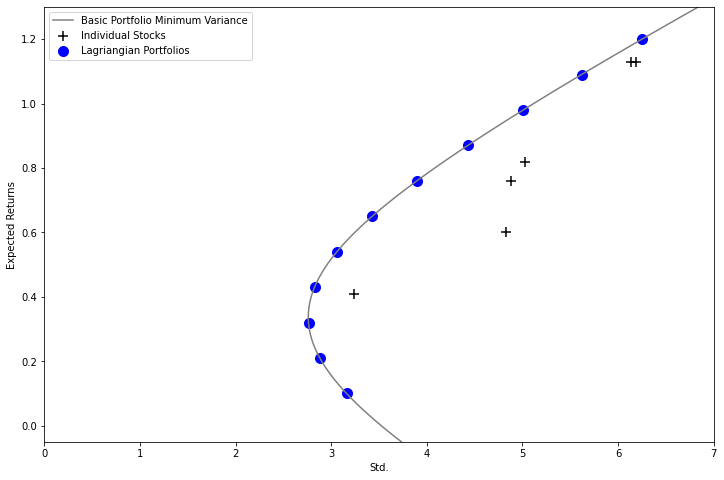

In [11]:
plt.figure(figsize=(12, 8))

# Minimum Variance w/o R
plt.plot(np.sqrt(b_varlamb), b_zlamb, c='gray',
         label='Basic Portfolio Minimum Variance')

# Stocks
variances = cov.diagonal()
plt.scatter(np.sqrt(variances), mu, c='black', marker='+', s=100,
            label='Individual Stocks')

# Lagrangian Portfolios
plt.scatter(np.sqrt(varp), zp, c='blue', marker='o', s=100,
            label='Lagriangian Portfolios')

plt.xlim(0, 7)
plt.ylim(-0.05,1.3)
plt.xlabel('Std.')
plt.ylabel('Expected Returns')
plt.legend()

plt.show()